### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
from haversine import haversine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import os 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator

In [4]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [5]:
s0_default: float = 1
p_default: float = 0.5

batch_size_default: int = 1

alpha_default: float = 0.1
eps_default: float = 1e-8

mu_default = 1e-2

tolerance_default: float = 1e-3
max_iter_default: int = 1000

In [17]:
class BaseDescent:
    """
    A base class and examples for all functions
    """

    def __init__(self):
        self.w = None

    def step(self, X: np.ndarray, y: np.ndarray, iteration: int) -> np.ndarray:
        """
        Descent step
        :param iteration: iteration number
        :param X: objects' features
        :param y: objects' targets
        :return: difference between weights
        """
        return self.update_weights(self.calc_gradient(X, y), iteration)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Example for update_weights function
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        pass


    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Example for calc_gradient function
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        pass

In [18]:
class GradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            step = self.eta(iteration) * calc_gradient(X, y)
            self.w -= step
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [19]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient1 = descent.calc_gradient(X, y)

assert gradient1.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [21]:
gradient1, diff

(array([-0.26970026, -0.29052939, -0.27212714, -0.27230177, -0.26312854]),
 array([0., 0., 0., 0., 0.]))

In [46]:
class StochasticDescent(BaseDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default,
                 batch_size: int = batch_size_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        :param batch_size: batch size (int)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.batch_size = batch_size
        self.loss_history = []
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            step = self.eta*self.calc_gradient(X[self.batch_size], y[self.batch_size]) 
            self.w -= step
            self.loss_history.append(mse(X@self.w, y))
        return self

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [47]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

# diff = descent.step(X, y, 0)

# assert diff.shape[0] == dimension, 'Weights failed'

In [48]:
np.all(gradient1 == gradient)

True

In [49]:
class MomentumDescent(BaseDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param alpha: momentum coefficient
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.alpha = alpha
        self.w = np.copy(w0)
        self.h = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        for i in range(iteration):
            self.h = self.h*self.alpha + self.eta*self.calc_gradient(X, y)
            self.w -= self.h
        return self

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [50]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

# diff = descent.step(X, y, 0)

# assert diff.shape[0] == dimension, 'Weights failed'

In [51]:
np.all(gradient1 == gradient)

True

In [52]:
class Adagrad(BaseDescent):
    """
    Adaptive gradient algorithm class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param eps: smoothing term (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.eps = eps
        self.w = np.copy(w0)
        self.g = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        self.g = np.zeros(np.shape(y))
        for i in range(iteration):
            k = np.random.randint(np.size(y))
            self.g = self.g + calc_gradient(X[k], y[k]) ** 2
            self.w = self.w - self.eta / ((self.g + self.eps)**0.5) * calc_gradient(X[k], y[k])
        return self        

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [53]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

# diff = descent.step(X, y, 0)

# assert diff.shape[0] == dimension, 'Weights failed'

In [54]:
np.all(gradient1 == gradient)

True

In [122]:
class LinearReg(BaseEstimator):
    def __init__(self, gd_type='stochastic', 
                 tolerance=tolerance_default, max_iter=max_iter_default, w0=None, eta=1e-2,
                batch_size: int = batch_size_default):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w = w0 
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.batch_size = batch_size
        self.real_iter = 0

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        X = sm.add_constant(X)
        
        if self.w==None:
            self.w=np.zeros(np.size(X,1))

        self.loss_history = []

        if self.gd_type == 'full':
            
            for i in range(self.max_iter):
                step=self.eta*self.calc_gradient(X,y) 
                w1=self.w.copy()
                self.w -= step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance: 
                    break
        
        else:
            
            for i in range(self.max_iter):
                self.real_iter += 1
#                 print(self.read_iter)
                sample_mask = random.sample([x for x in range(X.shape[0])], self.batch_size)
                step=self.eta*self.calc_gradient(X[sample_mask], y[sample_mask])  
                w1=self.w.copy()
                self.w = self.w-step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance:
                    break

        return self
    
    def predict(self, X):
        X = sm.add_constant(X)
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return X.T.dot(X.dot(self.w)-y)/np.size(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """
        return mse(X@self.w, y)

In [100]:
import seaborn as sns

<AxesSubplot:>

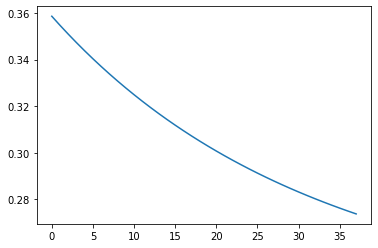

In [103]:
sg=LinearReg(eta=0.01, batch_size=2).fit(X, y)
sg

sns.lineplot(x=np.arange(len(sg.loss_history)), y=sg.loss_history)

## Задание 4. Работа с данными (1 балл)

In [58]:
df = pd.read_csv('../homework2/train.csv')
df['log_trip_duration']=np.log1p(df['trip_duration'])

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

df['hour']=df['pickup_datetime'].dt.hour
df['weekday']=df['pickup_datetime'].dt.weekday
df['day']=df['pickup_datetime'].dt.date
df['daypor']=df['pickup_datetime'].dt.dayofyear
df['month']=df['pickup_datetime'].dt.month

df['distance']=df.apply(lambda x: haversine((x['pickup_longitude'],x['pickup_latitude']),
                                                      (x['dropoff_longitude'],x['dropoff_latitude'])), axis=1).values


X_train, X_test = train_test_split(df, test_size=0.3, random_state=0)

categorical=list(['month', 'weekday', 'hour', 'distance'])
numeric_features=list(['daypor'])
features=numeric_features+categorical

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.fit_transform(X_test[features])

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [109]:
columns = ['eta', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
full_df = pd.DataFrame(columns=columns)
sg_df = pd.DataFrame(columns=columns)


for i in range(0, 7):
    #full gd
    gd_full=LinearReg(eta=0.1*(10**(-i))).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

    y_train_pred = gd_full.predict(X_train_scaled)
    y_pred = gd_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    full_df = pd.concat([full_df, temp_test_df], ignore_index=True)
    
    sg_full=LinearReg(eta=0.1*(10**(-i)), batch_size=30).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())
    
    y_train_pred = sg_full.predict(X_train_scaled)
    y_pred = sg_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
full_df

,eta,test_mse,test_r2,train_mse,train_r2
0,1.000000e-01,25.329651,39.228257,25.354980,38.943635
1,1.000000e-02,25.290207,39.165613,25.315144,38.880879
2,1.000000e-03,25.065720,38.809084,25.086699,38.520991
3,1.000000e-04,39.932453,62.420256,39.933882,61.910892
4,1.000000e-05,42.453293,66.423826,42.454501,65.881816
5,1.000000e-06,42.454107,66.425118,42.455314,65.883097
6,1.000000e-07,42.454188,66.425248,42.455396,65.883225


In [110]:
sg_df

,eta,test_mse,test_r2,train_mse,train_r2
0,1.000000e-01,35.510581,55.397491,35.480737,54.895513
1,1.000000e-02,35.471623,55.335618,35.442264,54.834904
2,1.000000e-03,35.166134,54.850444,35.141498,54.361084
3,1.000000e-04,41.183953,64.407874,41.184808,63.881572
4,1.000000e-05,42.453504,66.424161,42.454712,65.882148
5,1.000000e-06,42.454128,66.425152,42.455335,65.883130
6,1.000000e-07,42.454190,66.425251,42.455398,65.883229


## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [123]:
batch_sizes = np.arange(5, 500, 50)

columns = ['batch_size', 'iter_count', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
sg_df = pd.DataFrame(columns=columns)


for batch_size in batch_sizes:
    print(batch_size)
    for i in range(5):

        sg_full=LinearReg(eta=1e-3, batch_size=batch_size).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

        y_train_pred = sg_full.predict(X_train_scaled)
        y_pred = sg_full.predict(X_test_scaled)

        test_mse = mse(X_test['log_trip_duration'], y_pred)
        test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
        train_mse = mse(X_train['log_trip_duration'], y_train_pred)
        train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)

        temp_test_df = pd.DataFrame({'batch_size':[batch_size],
                                     'iter_count': [sg_full.real_iter],
                                     'test_mse': [test_mse],
                                     'test_r2': [-test_r2],
                                     'train_mse': [train_mse],
                                     'train_r2': [-train_r2]})

        sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
sg_df

5
55
105
155
205
255
305
355
405
455


,batch_size,iter_count,test_mse,test_r2,train_mse,train_r2
0,5,1000,6.150420,8.768026,6.153454,8.694005
1,5,1000,6.119768,8.719344,6.122696,8.645551
2,5,1000,6.161055,8.784915,6.164193,8.710923
3,5,1000,6.217082,8.873897,6.220011,8.798859
4,5,1000,6.148853,8.765537,6.151649,8.691162
5,55,1000,6.135889,8.744948,6.138895,8.671069
6,55,1000,6.122683,8.723974,6.125532,8.650018
7,55,1000,6.120752,8.720907,6.123632,8.647026
8,55,1000,6.134695,8.743052,6.137751,8.669268
9,55,1000,6.129581,8.734929,6.132525,8.661034
